In [1]:
import pandas as pd
import scipy as sp
import numpy as np

from abtools import ABtest, LognormalModel
from abtools.plotting import qqplot, ppplot

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
data = pd.read_csv('data.csv').query('revenue > 0')

In [3]:
log_data = np.log(data.revenue)

In [14]:
m = LognormalModel(data['revenue'])

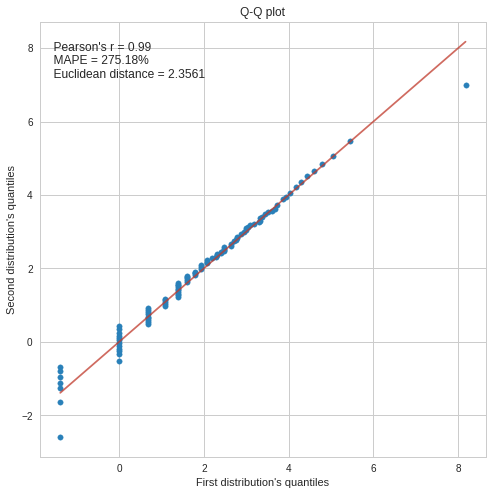

In [15]:
qqplot(log_data, np.log(m.sample_ppc(1000)))

In [17]:
a = data.query('abgroup == "control"')['revenue']
b = data.query('abgroup == "test"')['revenue']

In [22]:
test = ABtest(LognormalModel, [a, b], 5000)

test.test_all()

ABtest for 2 groups


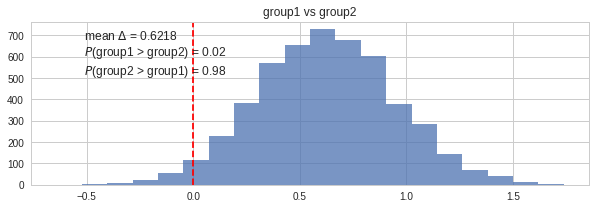

In [23]:
test.plot()

In [24]:
test.probabilities_df

,group1,group2,mean
group1,-,0.9754,21.8011425844
group2,0.0246,-,22.4173097151
mean,21.8011425844,22.4173097151,-
